In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model

2024-06-04 23:57:36.209833: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 23:57:36.209903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 23:57:36.210635: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-04 23:57:36.217424: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 23:57:36.906833: W tensorflow/compiler/tf2

In [2]:
# Load the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

2024-06-04 23:57:40.675102: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-04 23:57:40.703164: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-04 23:57:40.703220: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-04 23:57:40.706183: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-04 23:57:40.706247: I external/local_xla/xla/stream_executor

In [7]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15


2024-06-04 23:57:43.230824: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-04 23:57:43.330259: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-04 23:57:43.912461: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-04 23:57:44.546541: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb1762f9ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-04 23:57:44.546589: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-06-04 23:57:44.563605: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1717534664.685602  134691 device_compil

1875/1875 [==============================] - 19s 8ms/step - loss: 0.5248 - accuracy: 0.8073 - val_loss: 0.3985 - val_accuracy: 0.8515
Epoch 2/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3676 - accuracy: 0.8620 - val_loss: 0.3361 - val_accuracy: 0.8739
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3167 - accuracy: 0.8806 - val_loss: 0.3309 - val_accuracy: 0.8747
Epoch 4/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2799 - accuracy: 0.8952 - val_loss: 0.3095 - val_accuracy: 0.8837
Epoch 5/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2582 - accuracy: 0.9028 - val_loss: 0.2961 - val_accuracy: 0.8913
Epoch 6/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2360 - accuracy: 0.9094 - val_loss: 0.2975 - val_accuracy: 0.8923
Epoch 7/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2174 - accuracy: 0.9178 - val_loss: 0.3114 - val_accuracy: 0

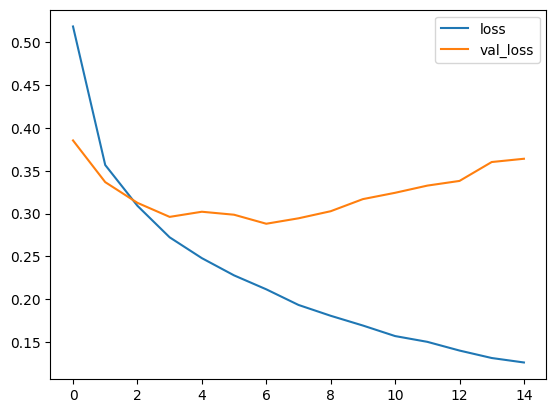

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

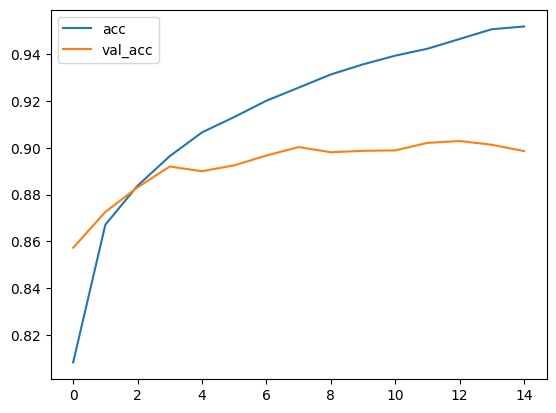

In [9]:
# Plot loss
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion Matrix without Normalization
[[861   2  34  14   1   1  83   0   4   0]
 [  1 982   2  11   2   0   1   0   1   0]
 [ 14   1 874   6  42   0  62   0   1   0]
 [ 17  16  31 878  34   0  22   0   2   0]
 [  0   2  88  14 828   0  67   0   1   0]
 [  0   0   0   0   0 973   0  19   0   8]
 [117   2  84  24  81   0 678   0  14   0]
 [  0   0   0   0   0   6   0 975   0  19]
 [  3   1   3   5   2   3   2   1 979   1]
 [  1   0   0   0   0   4   0  37   0 958]]


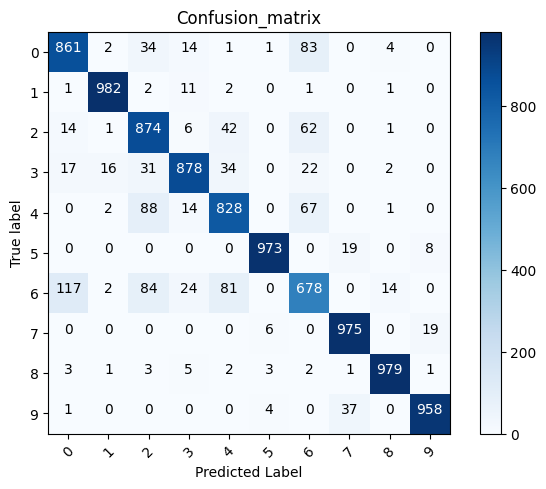

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion_matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix without Normalization')

  print(cm)

  plt.imshow(cm, interpolation ='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
    horizontalalignment = 'center',
             color='white' if cm[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

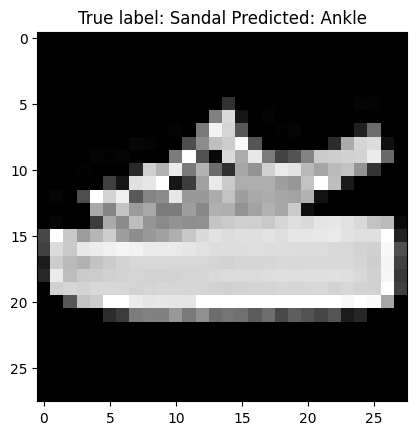

In [12]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [13]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170498071/170498071 [==============================] - 31s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [14]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [15]:
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D

In [16]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [17]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 30s 15ms/step - loss: 1.2857 - accuracy: 0.5564 - val_loss: 0.9839 - val_accuracy: 0.6518
Epoch 2/15
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8515 - accuracy: 0.7023 - val_loss: 0.8721 - val_accuracy: 0.7089
Epoch 3/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6990 - accuracy: 0.7589 - val_loss: 0.8312 - val_accuracy: 0.7231
Epoch 4/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5941 - accuracy: 0.7969 - val_loss: 0.6571 - val_accuracy: 0.7888
Epoch 5/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5014 - accuracy: 0.8263 - val_loss: 0.6690 - val_accuracy: 0.7785
Epoch 6/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4281 - accuracy: 0.8529 - val_loss: 0.6618 - val_accuracy: 0.7858
Epoch 7/15
1563/1563 [==============================] - 21s 14ms/step - loss: 0.3601 - accuracy: 0.8742 - val_loss: 0.5907 -

In [18]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.6041 - accuracy: 0.8025 - val_loss: 0.6707 - val_accuracy: 0.7958
Epoch 2/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.5032 - accuracy: 0.8323 - val_loss: 0.5235 - val_accuracy: 0.8309
Epoch 3/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.4633 - accuracy: 0.8431 - val_loss: 0.5565 - val_accuracy: 0.8199
Epoch 4/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.4366 - accuracy: 0.8524 - val_loss: 0.4681 - val_accuracy: 0.8450
Epoch 5/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4135 - accuracy: 0.8600 - val_loss: 0.5086 - val_accuracy: 0.8372
Epoch 6/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3986 - accuracy: 0.8642 - val_loss: 0.5091 - val_accuracy: 0.8323
Epoch 7/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3788 - accuracy: 0.8730 - val_loss: 0.5279 -

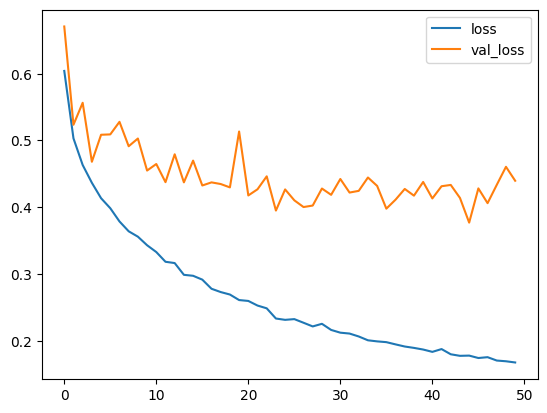

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

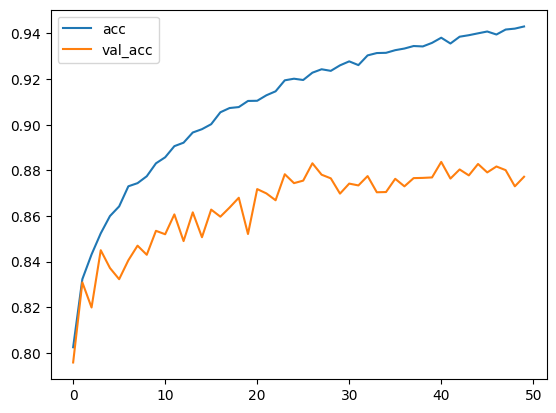

In [20]:
# Plot loss
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[895  13  13   9  11   2   3   9  21  24]
 [  3 968   0   0   1   0   1   0   4  23]
 [ 36   3 788  37  41  27  41  16   3   8]
 [ 16   5  22 734  35 104  39  25   7  13]
 [ 12   1  13  30 877  19  26  17   1   4]
 [  4   5  12  83  33 820  12  24   1   6]
 [  3   1  14  24  16  11 923   4   1   3]
 [  7   1   3  10  16  23   4 930   1   5]
 [ 46  18   1   0   2   0   1   2 900  30]
 [  6  42   0   4   0   1   1   3   6 937]]


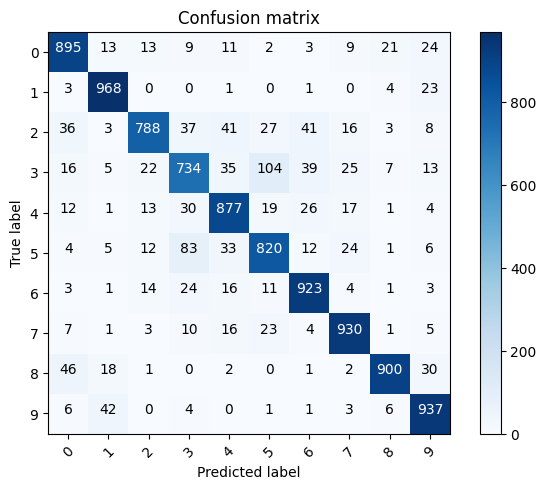

In [21]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [22]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

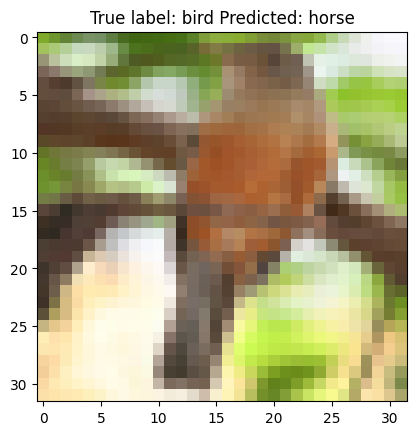

In [23]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [24]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0   